# The R tutorial

This notebook summarises the R tutorial by Trevor Stephens ([link](http://trevorstephens.com/kaggle-titanic-tutorial/getting-started-with-r/)) tackling the [Titanic Kaggle competition](https://www.kaggle.com/c/titanic). Let's see how it goes.

#### Set working directory 

Variables and objects are assigned by '<-' operator

Now lets set the working directory with `setwd()`.

In [1]:
setwd("~/TestingArea/Tutorials/R")

#### Read datasets

In [2]:
train<-read.csv("train.csv")

In [3]:
test<-read.csv("test.csv")

Let's see what we loaded. We can use R's `View` for it. You can always get help by typing `?View`. In a jupyter notebook we can simply print the dataset. This is possible in the script, too, but gets very difficult to read. 

Instead let's use `head`, which is the equivalent to pandas `DataFrame.head()` to see what is inside the dataset.

In [4]:
head(train,2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C


In [5]:
tail(test,2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1308,3,"Ware, Mr. Frederick",male,NA,0,0,359309,8.05,,S
418,1309,3,"Peter, Master. Michael J",male,NA,1,1,2668,22.3583,,C


We have different features in the dataset, which we clearly need to understand (Kaggle competition helps).
- **PassengerID**: Identified for the passenger
- **survival**: Survival
   - 0 = No; 1 = Yes
- **pclass**: Passenger Class
   - 1 = 1st; 2 = 2nd; 3 = 3rd
- **name**: Name of the passenger
- **sex**: Sex of the passenger
- **age**: Age
- **sibsp**: Number of Siblings/Spouses aboard
- **parch**: Number of Parents/Children aboard
- **ticket**: Ticket Number
- **fare**: Passenger Fare
- **cabin**: Cabin number
- **embarked**: Port of Embarkation
   - C = Cherbourg; Q = Queenstown; S = Southampton

Additionally, some columns of the dataset are not fully filled (cabin has empty slots, age is sometimes `NA`, while int else ,or the format of the ticket does not seem to be consistent)

We notice that the test dataset has no `survival` feature. Sure, we're going to predict this :)

#### Lets have a look at the structure of the data

In [6]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


So we have a sample of 891 observations (passengers) in the training set and 12 variables (features). Different data types appear:
- **int/num**: integer and numerical value (float)
- **factor**: Compares to a category. E.g. for strings "male" and "female": factor w/ 2 Levels (1,2)
To import strings from a dataset and keep it as strings, we could have used ```read.csv("train.csv",stringsAsFactors=FALSE)```

For the *name* variable we find 891 levels, which mean that there are not two passengers with the same factory level and therefore same name (?). For *ticket* and *cabin* there are less levels due to missing entries or same entries (?).

In [7]:
head(train$Survived,4) # separate a column from the dataset ($ operator)

[1] 0 1 1 1

In [8]:
table(train$Survived) # table sums occurances in the train$Survived column


  0   1 
549 342 

From using *table()* we infer that 549 passenger have died while 342 survived. What's the percentage? 

In [9]:
prop.table(table(train$Survived)) 


        0         1 
0.6161616 0.3838384 

#### Create a survived prediction column in the test dataframe 
first asume everyone died

In [10]:
test$Survived <- rep(0,418)

In [11]:
head(test,2) # check if survived column is present now?

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q,0
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S,0


## Let's try to make sense (women and children first?)

In [12]:
summary(train$Sex)

female   male 
   314    577

In [13]:
prop.table(table(train$Sex, train$Survived),1) #1,2 for horizontal (row) or vertical (column) proportion

        
                 0         1
  female 0.2579618 0.7420382
  male   0.8110919 0.1889081

### 74% of all female passengers survived, while only 19% of the male did

### predict: women survide, male die

In [14]:
test$Survived <- 0
test$Survived[test$Sex=='female'] <- 1

In [15]:
summary(train$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

Now see how many minors there are (assuming the NA are of average age)

In [16]:
train$Child <- 0
train$Child[train$Age<18] <- 1

Sums up survived passengers by categories "Child" and "Sex"

In [17]:
aggregate(Survived ~ Child + Sex, data=train, FUN=sum)

,Child,Sex,Survived
1,0,female,195
2,1,female,38
3,0,male,86
4,1,male,23


But how many passengers are in the categories?

In [18]:
aggregate(Survived ~ Child + Sex, data=train, FUN=length)

,Child,Sex,Survived
1,0,female,259
2,1,female,55
3,0,male,519
4,1,male,58


Again the proportions would be more helpful, luckily we can define custom functions.

In [19]:
aggregate(Survived ~ Child + Sex, data = train, FUN=function(x){sum(x)/length(x)})

,Child,Sex,Survived
1,0,female,0.752895752895753
2,1,female,0.690909090909091
3,0,male,0.165703275529865
4,1,male,0.396551724137931


Not surprised: most females survived, most men did not --- regardless if child or not. Still chances are better for children

## Look at some other variables

First let's bin the ticket fare

In [20]:
train$Fare2 <- '30+'

train$Fare2[train$Fare>=20 & train$Fare<30] <- '20-30'

train$Fare2[train$Fare>=10 & train$Fare<20] <- '10-20'

train$Fare2[train$Fare<10] <- '<10'

Now check how the fare behaves in different subsets of the data

In [21]:
aggregate(Survived ~ Fare2 + Pclass + Sex, data=train, FUN=function(x){sum(x)/length(x)})

,Fare2,Pclass,Sex,Survived
1,20-30,1,female,0.833333333333333
2,30+,1,female,0.977272727272727
3,10-20,2,female,0.914285714285714
4,20-30,2,female,0.9
5,30+,2,female,1
6,<10,3,female,0.59375
7,10-20,3,female,0.581395348837209
8,20-30,3,female,0.333333333333333
9,30+,3,female,0.125
10,<10,1,male,0


#### We can do a 'cut-based' prediction
females in 1st and 2nd class survive, 3rd class survives with ticket fare <20.
men all die.

In [22]:
test$Survived <- 0
test$Survived[test$Sex == 'female'] <- 1
test$Survived[test$Sex == 'female' & test$Pclass==3 & test$Fare>=20] <- 0

W/o any randomness, this means #2336 on the leaderboard with an accuracy of 0.77990.

Now add a little randomness to the model, and see what happens. First class males with a ticket fare of >10 have still 40% survival rate.

In [23]:
test$Survived[test$Sex=='male' & test$Pclass==1 & test$Fare>=10 & test$PassengerId %% 10<=3] <- 1

In [24]:
head(subset(test, test$Sex=='male' & test$Pclass==1 & test$Fare>10),4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
12,903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S,1
21,912,1,"Rothschild, Mr. Martin",male,55,1,0,PC 17603,59.4,,C,1
24,915,1,"Williams, Mr. Richard Norris II",male,21,0,1,PC 17597,61.3792,,C,0
29,920,1,"Brady, Mr. John Bertram",male,41,0,0,113054,30.5,A21,S,1


In [25]:
prop.table(table(test$Survived[test$Sex=='male' & test$Pclass==1 & test$Fare>10]))


        0         1 
0.6363636 0.3636364 

It is not 40%, so reduce to randomness... with <=3 in modulo this is ok. Let's see if randomness improves the result.

Ok the randomness leads to q score of 0.75120. Which is worse than w/o randomness!!

## Let's move on to decision trees

They come with advantages: easy to understand, can be visualized and are foundation to modern ML algorithms (BDTs).

Decision trees choose the best variable to split the data (according to most pure node samples: most 'amount of signal')

In [26]:
prop.table(summary(train$Sex))

female     male 
0.352413 0.647587

#### Get the 'Recursive partitioning and regression trees' library

In [27]:
library(rpart)

In [28]:
decTree <- rpart(Survived~ Pclass + Sex + Age + SibSp + Parch+ Fare+ Embarked, 
     data = train,
     method = "class")

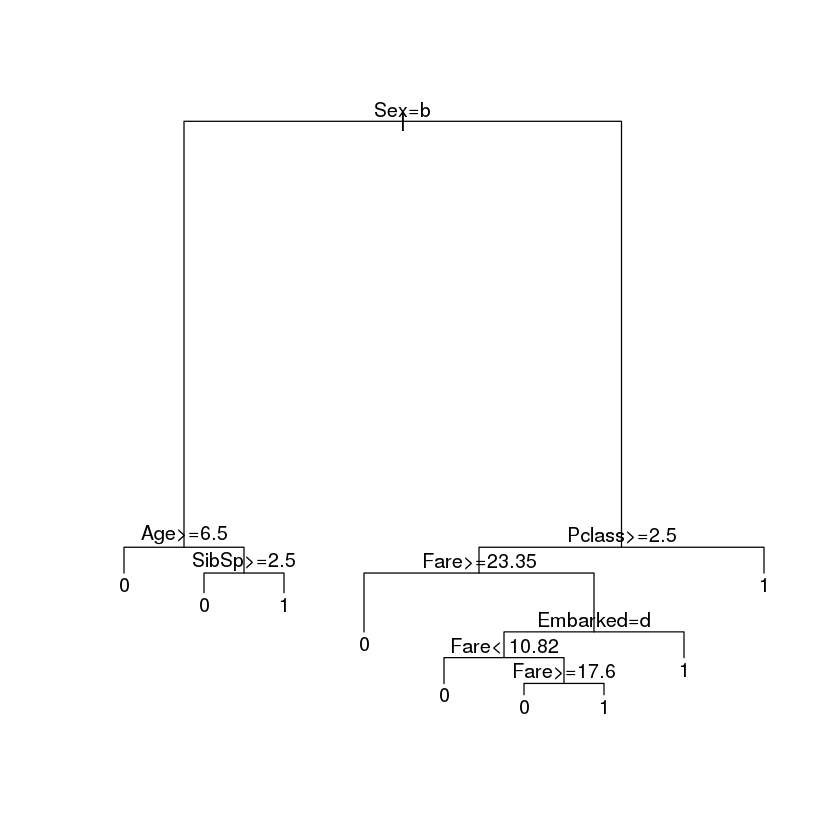

In [29]:
plot(decTree)
text(decTree)

That is ugly. But there are solutions: let's install the packages 'rattle', 'rpart-plot', and 'RColorBrewer' by
```
install.packages('rattle')
install.packages('rpart.plot')
install.packages('RColorBrewer')
```

Again an issue installing `rattle` from inside R. 
Seems to work by installing
```
sudo apt-get install libgtk2.0-dev
```
Then, let's try to load the libraries.

In [30]:
library(rattle)
library(rpart.plot)
library(RColorBrewer)

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


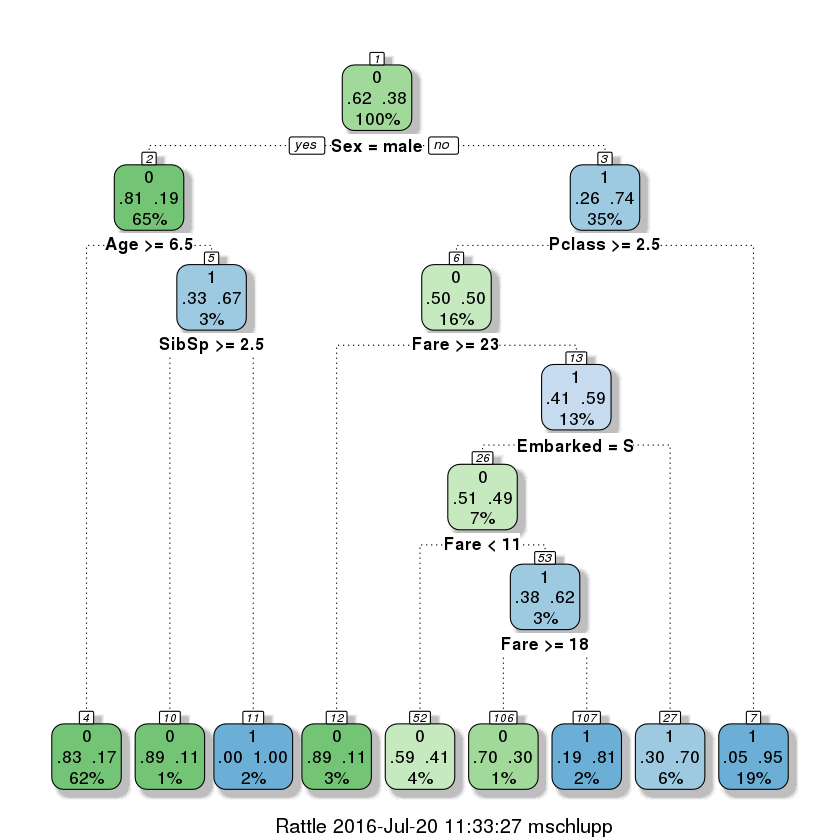

In [31]:

fancyRpartPlot(decTree)

Let's go crazy and split the data until one passenger is categorized in one leaf...

In [44]:
decTreeOverfit <- rpart(Survived~Pclass+Sex+Age+SibSp+Parch+Fare+Embarked,
                       data=train,
                       method='class',
                       control = rpart.control(minsplit=2, cp=0))

We can use the decision tree to predict the test sample. The overfitted example has 
```
minsplit=2,
cp=0
```
which means that the minimum samples size to consider a new split is 2 (1 doesn't make sense here) and `cp` stands for the complexity parameter that determines the decrease in lack (loss) of the split. `cp = 0` means that the splits are performed regardless of the lack. This example would perform worse on the test sample as on the training sample.

In [73]:
dt_prediction <- predict(decTree, test, type='class')

In [77]:
test$Survived <- dt_prediction

### Solutions to the problem can be submitted in csv format
It has to contain the test sample's passenger's id and the prediction of survival:

In [75]:
solution <- data.frame(PassengerId = test$PassengerId, Survived = test$Survived)

#### Write to csv file

In [76]:
write.csv(solution, file="solution.csv", row.names=FALSE) # not exactly sure if Kaggle allows for row names. to be tested